In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob

plt.style.use("seaborn-poster")

In [18]:

n = 20000
Days_list = (-3,-2,-1,0,1,2)
path = "./results/"+str(n)+"allpc_" #"./results/pc_"
df = pd.DataFrame()


for file in glob.glob(path+"*DL*old.csv"):
    temp = pd.read_csv(file)
    #temp['pc'] = pc
    #temp['DAYS'] = days
    df = df.append(temp)
df.pc = ["$%s$" % x for x in df.pc]
df.head()

DAYS  actual_gen_times_25  actual_gen_times_75  actual_gen_times_mean  \
0   0.0              0.97804             3.698938               2.584128   
1   0.0              0.97804             3.698938               2.584128   
2   0.0              0.97804             3.698938               2.584128   
3   0.0              0.97804             3.698938               2.584128   
4   0.0              0.97804             3.698938               2.584128   

   cases     pc  prop_cases_prevented_25  prop_cases_prevented_75  \
0   4737  $1.0$                      0.0                      0.0   
1     18  $1.0$                      0.0                      0.0   
2     71  $1.0$                      0.0                      0.0   
3  12367  $1.0$                      0.0                      0.0   
4   2714  $1.0$                      0.0                      0.0   

   prop_cases_prevented_mean  sim  
0                   0.092579    0  
1                   0.092579    1  
2                   0.092579    2  
3                   0.092579    3  
4                   0.092579    4

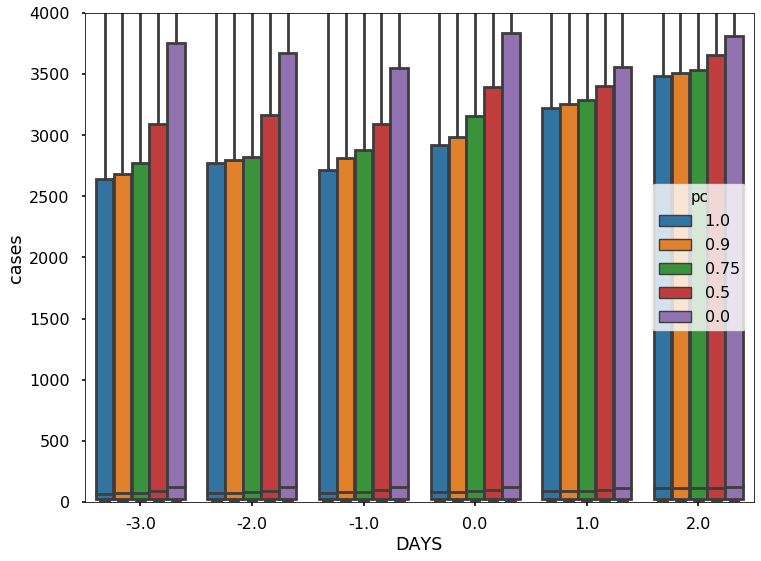

In [19]:
import seaborn as sns

#zoomed out 
fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="cases",
    hue="pc",
    data =df,
    ax=ax
    )
ax.set_ylim((0,4000))
plt.show()

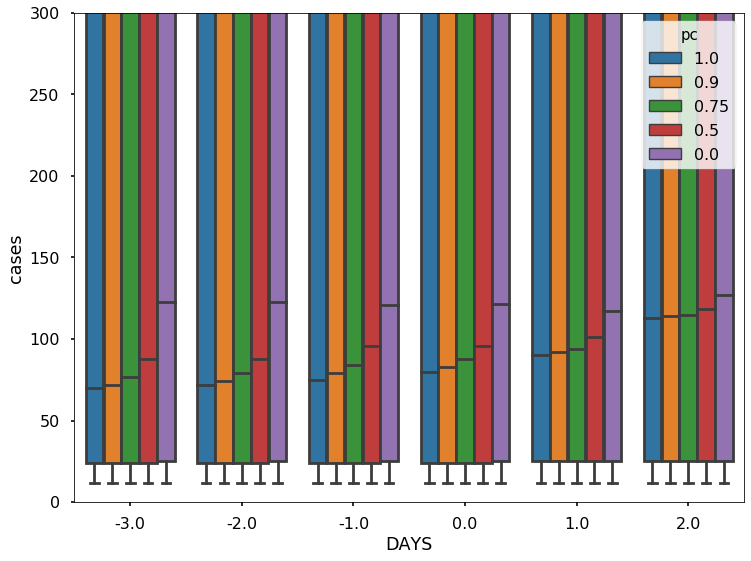

In [20]:

#zoomed in

fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="cases",
    hue="pc",
    data =df,
    ax=ax
    )
ax.set_ylim((0,300))
plt.show()

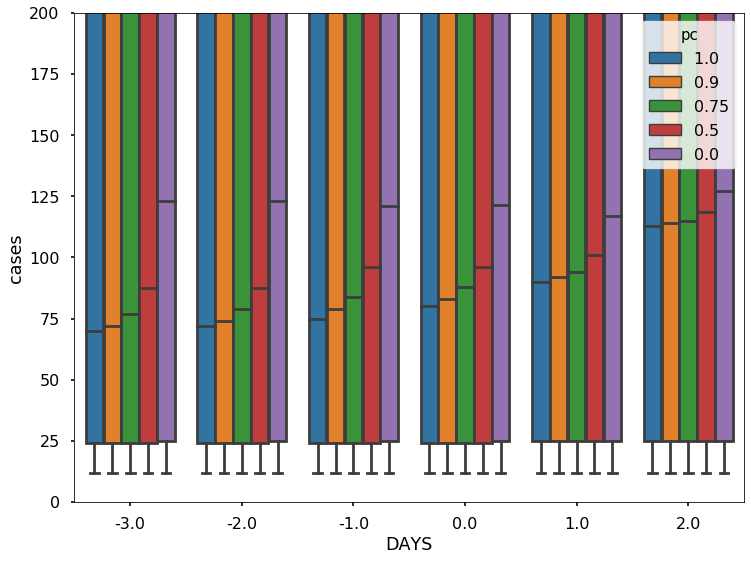

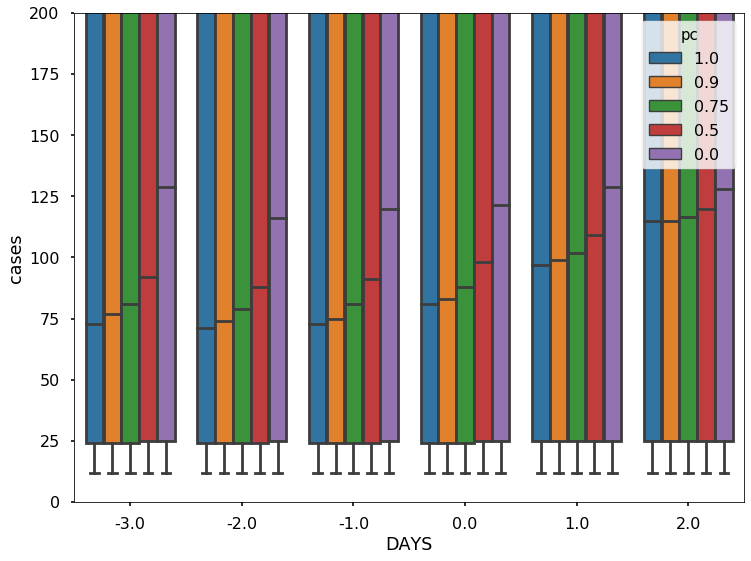

In [24]:

n = 20000
Days_list = (-3,-2,-1,0,1,2)
path = "./results/"+str(n)+"allpc_" #"./results/pc_"
df2 = pd.DataFrame()


for file in glob.glob(path+"*heap.csv"):
    temp = pd.read_csv(file)
    #temp['pc'] = pc
    #temp['DAYS'] = days
    df2 = df2.append(temp)
df2.pc = ["$%s$" % x for x in df2.pc]


#zoomed in

fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="cases",
    hue="pc",
    data =df,
    ax=ax
    )
ax.set_ylim((0,200))
plt.show()

#zoomed in

fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="cases",
    hue="pc",
    data =df2,
    ax=ax
    )
ax.set_ylim((0,200))
plt.show()

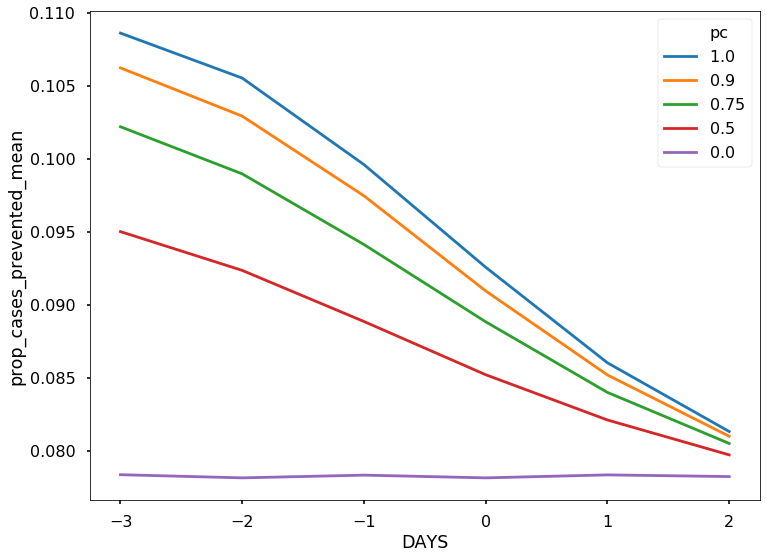

In [23]:
fig,ax = plt.subplots(figsize=(12,9))

lines =sns.lineplot(
    x="DAYS",
    y="prop_cases_prevented_mean",
    hue="pc",
    data =df2,
    ax=ax
    )

#for pc in ["$0.5$","$0.75$","$0.9$",'$1.0$']:
#    ax.fill_between(np.repeat(Days_list,20000), 
#                    df.loc[df.pc==pc, "prop_cases_prevented_25"],
#                    df.loc[df.pc==pc, "prop_cases_prevented_75"],
#                   alpha=0.2
#                   )

#ax.set_ylim((0,0.2))
plt.legend()

plt.show()

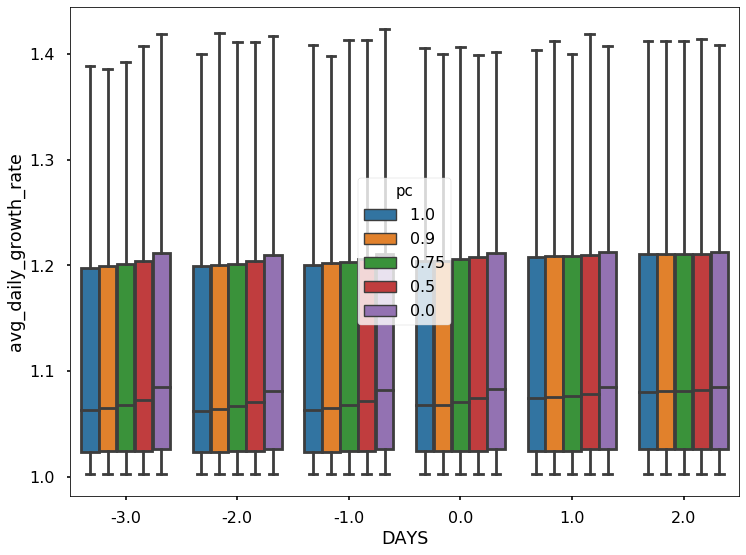

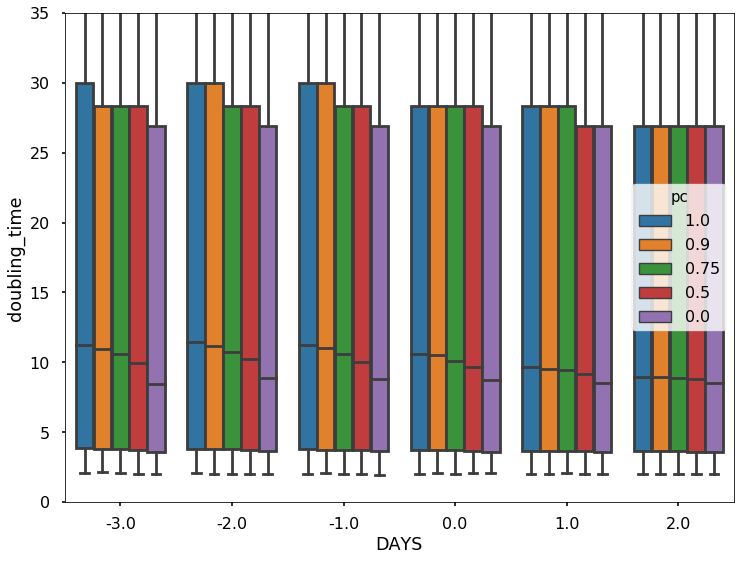

In [32]:
## growth rate and doubling time

df2['avg_daily_growth_rate'] = (df2.cases/12)**(1/30) 
df2.loc[df2.avg_daily_growth_rate==1,'avg_daily_growth_rate'] = np.NaN
df2['doubling_time'] = np.log(2)/np.log(df2.avg_daily_growth_rate)

fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="avg_daily_growth_rate",
    hue="pc",
    data =df2,
    ax=ax
    )

fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="doubling_time",
    hue="pc",
    data =df2,
    ax=ax
    )
ax.set_ylim((0,35))
plt.show()



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


inf

In [36]:
def toy(child,parent_detected, DAYS=-2, parent_sot = 5, parent_at = 8):
    from random import random
    if parent_detected:
        print("parent detected")
        if child < parent_sot + DAYS:
            print("Too early, not traced")
        elif child < parent_at:
            if random()< 0.5:
                print("Traced")
            else:
                print("Not traced")
    else:
        print("parent undetected")


In [47]:
toy(3, False)

parent undetected


In [18]:
def new_sampler(items, weights=None):
    from numpy.random import random
    r = random()
    if weights is None:
        #Create uniform weights
        #weights = [1/len(items)] * len(items)
        index = int(r*len(items))
        return items[index]
    else:
        for i,item in enumerate(items):
            r-= weights[i]
            if r <0:
                return item
            
def old_sampler(items, weights=None):
    from numpy.random import random
    r = random()
    if weights is None:
        #Create uniform weights
        weights = [1/len(items)] * len(items)


    for i,item in enumerate(items):
        r-= weights[i]
        if r <0:
            return item

x = np.random.random(size=1000)

In [21]:
import timeit

timeit.timeit(stmt="new_sampler(x)", 
              setup="from __main__ import new_sampler,old_sampler,x",
             number = 1000,
             )


0.0018868010010919534

In [22]:
timeit.timeit(stmt="old_sampler(x)", 
              setup="from __main__ import new_sampler,old_sampler,x",
             number=1000,
             )

0.09406599900103174

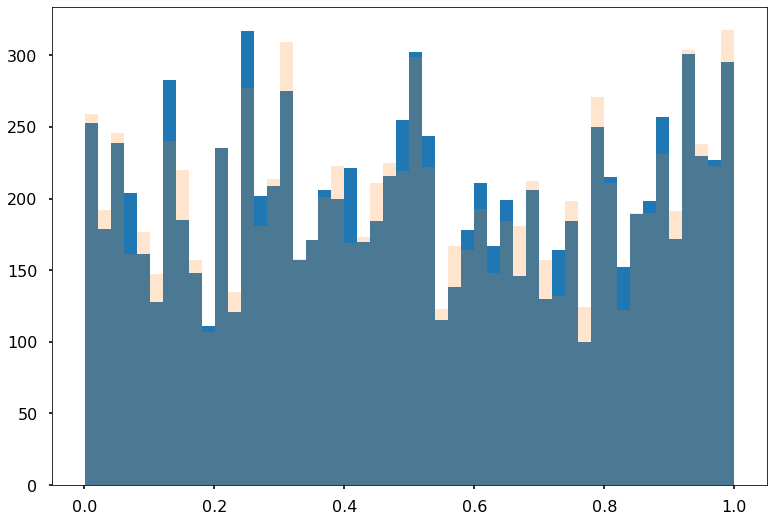

In [28]:
n = [new_sampler(x) for n in range(10000) ]
o = [old_sampler(x) for n in range(10000)]

fig,ax = plt.subplots()

ax.hist(n, bins=50)
ax.hist(o, alpha=0.2, bins=50)

plt.show()


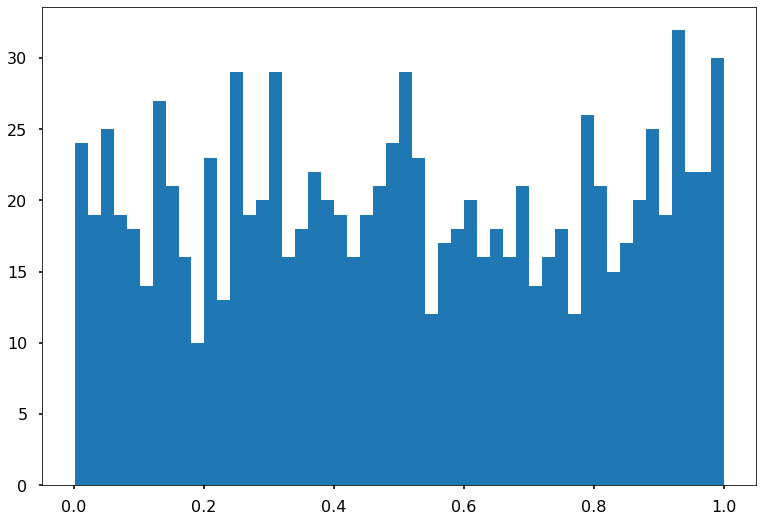

In [29]:
plt.hist(x,bins=50)
plt.show()